In [192]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.2
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


In [193]:
import tensorflow as tf
import os

In [194]:
os.path.join('data','happy')

'data/happy'

In [195]:
'''os.listdir('data') # lists files in data folder'''

"os.listdir('data') # lists files in data folder"

In [196]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [197]:
# limit memory consumption, use only the bare minimum of the gpu resource
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

# Remove outlier images (i.e. images with the wrong extension or unreadable)

In [198]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/data'
os.listdir(data_dir)

['sad', 'happy']

In [199]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [200]:
data_dir

'/content/drive/MyDrive/Colab Notebooks/data'

In [201]:
allowed_image_extensions = ['jpeg', 'jpg', 'png', 'bmp']
allowed_image_extensions

['jpeg', 'jpg', 'png', 'bmp']

In [202]:
os.listdir(os.path.join(data_dir, "happy"))

['1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'How_Happy_Are_People_at_Work.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'getty_505175324_2000131020009280246_158016.jpg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 '60632274._UY200_.jpg',
 'friends-happy-190821-800x450.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed.jpg',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 'Happy_People_Happy_Man.jpg',
 'How-to-Be-Happy_1200x628-facebook.jpg',
 '1902587.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 '960x0.jpg',
 '_happy_jumping_on_beach-40815.jpg',
 '7-Habits-of-Happy-Peop

In [203]:
for image_class in os.listdir(data_dir):
  print(image_class)

sad
happy


In [204]:
for image_class in os.listdir(data_dir):
  print(image_class.capitalize(), "images:")
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)
  print("\n")

Sad images:
504212.jpg
0x0.jpg
1000_F_58495935_Nr9VzQljLyN3RKKhGDGxQDBEkqIeLzrZ.jpg
405-4050267_sad-people-png-sad-person-transparent-background-png.png
280-2804580_sad-people-png-sad-person-png-transparent-png.png
crying-at-work.jpg
52672678._SX318_SY475_.jpg
DD-blogpost-SAD-940x492.png
73705bd7debb66c2afc780a22c223804.jpg
fTw5aVC5_400x400.jpg
dreamstime_s_101440985.jpg
iStock_000001932580XSmall.jpg
51079685_M-1280x429.jpg
image10.jpeg
b11b520b0818895ae5563d1e70294052.jpg
Depressed-woman-covering-her-eyes.jpg
b2ap3_large_happy-sad-unsplash-850x575.jpg
SAD.jpg
766x415_Depression_vs_Sadness.jpg
gettyimages-957787572.jpg
at-home-sad-sofa-300x200.jpg
de2a0f4d137d0aeb839d43a2ea9b6c72.jpg
8iAb9k4aT.jpg
6-Best-and-worst-things-to-say.jpg
boy-with-head-down.jpg
Make-someone-sad-happy.jpg
ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
image.jpeg
Crying-girl.jpg
7RNXwSxCAKL8vGtXG2ZkyD.jpg
artworks-inq7uS3bz9CqNd3d-fqs6TA-t500x500.jpg
image11.jpeg
image-20160914-4963-19knfh1.jpg
Sad-

In [205]:
# remove outlier images of not desired file extension format
counter = 0
for image_class in os.listdir(data_dir):

  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img_readable = cv2.imread(image_path)
      valid_file_extension = imghdr.what(image_path)

      # print(image_path)

      if valid_file_extension not in allowed_image_extensions:
        os.remove(image_path)
        print(valid_file_extension, "removed due to invalid file extension")

      counter+=1
    except Exception as e:
      print(image_path)
      print("Issue reading the image,", "iterated", counter, "images")

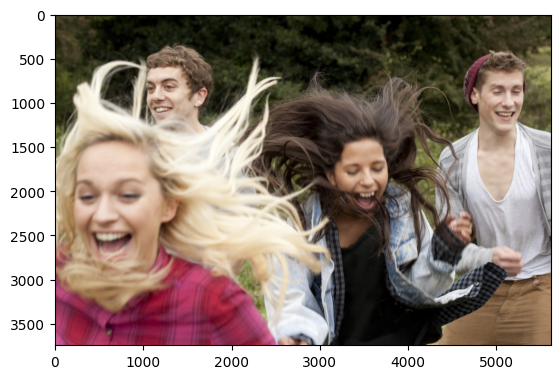

In [206]:
test_read_image = cv2.imread(os.path.join(data_dir, "happy", "154006829.jpg"))
test_read_image = cv2.cvtColor(test_read_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_read_image)
plt.show()

# Load images into Keras Data Pipeline

In [207]:
tf.data.Dataset??
# ?? brings up the documentation for that line

In [208]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [209]:
import numpy as np

In [210]:
os.listdir(data_dir)

['sad', 'happy']

In [211]:
# building data pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [212]:
# allowing access to pipeline
data_iterator = data.as_numpy_iterator()

In [213]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [214]:
data_iterator

In [215]:
# get a batch of 32 from the iterator
batch = data_iterator.next()

In [216]:
len(batch)

2

In [217]:
# part 1: images loaded into memory as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [218]:
# part 2: classes determining which image is happy or sad (0 for happy, 1 for sad)
batch[1]

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int32)

In [219]:
def visualize_batch(batch):
  fig, ax = plt.subplots(ncols=4, figsize=(20,20))
  for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [220]:
# get new batch of data
batch = data_iterator.next()

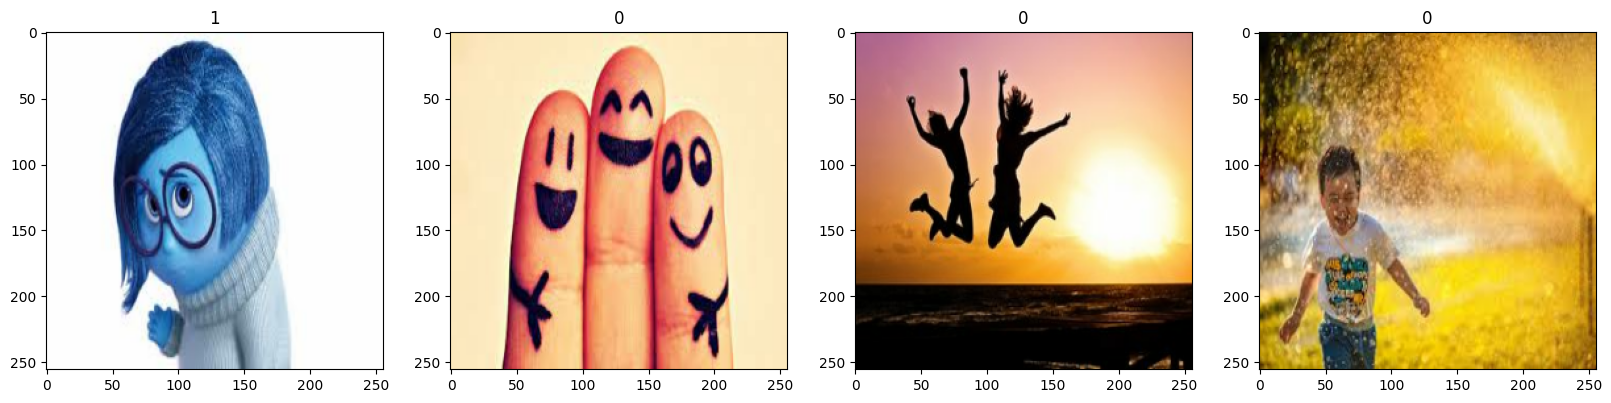

In [221]:
visualize_batch(batch)

# Preprocessing Step

In [222]:
batch[0].shape

(32, 256, 256, 3)

In [223]:
batch[0].min(), batch[0].max()

(0.0, 255.0)

In [224]:
scaled = batch[0]/255

In [225]:
scaled.min(), scaled.max()

(0.0, 1.0)

In [226]:
# apply transformation to batch
# x represents features
# y represents target variables
data = data.map(lambda x,y: (x/255, y))

In [227]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [228]:
scaled_iterator = data.as_numpy_iterator()

In [229]:
batch = scaled_iterator.next()

In [230]:
def visualize_scaled_batch(batch):
  fig, ax = plt.subplots(ncols=4, figsize=(20,20))
  for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

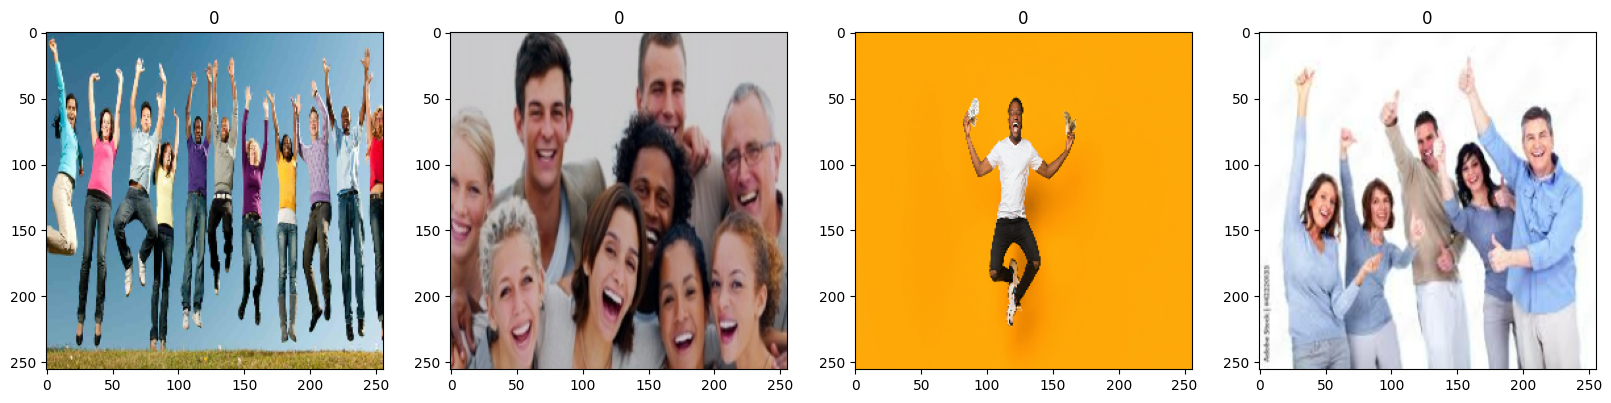

In [231]:
visualize_scaled_batch(batch)

In [232]:
batch[0].min(), batch[0].max()

(0.0, 1.0)

# Split data into training, valuation, and test sets

In [233]:
train_size = int(len(data)*0.7)
val_size = int(len(data)* 0.2)
test_size = int(len(data)*0.1)

In [234]:
len(data) # number of batches

10

In [235]:
train_size, val_size, test_size

(7, 2, 1)

In [236]:
# batches allocated
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [237]:
len(test)

1

In [238]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten

In [239]:
model = Sequential()

In [240]:
# 16 filters, 3x3 pixel stride size, scans over image and extracts relevant details to make a classfication
# adding multiple convolutional layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu')) # 256 neurons, relu activation
model.add(Dense(1, activation='sigmoid')) # only 1 output with a sigmoud activation which is useful since happy and sad are associated with 0 and 1 respectively



In [241]:
# adam optimizer, determine accuracy the metric
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [242]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [243]:
logdir = '/content/drive/MyDrive/Colab Notebooks/logs'
os.listdir(logdir)

['train', 'validation']

In [244]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [245]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 9s 572ms/step - loss: 1.3116 - accuracy: 0.4821 - val_loss: 0.6883 - val_accuracy: 0.7188
Epoch 2/20
7/7 [==============================] - 8s 832ms/step - loss: 0.6852 - accuracy: 0.5982 - val_loss: 0.6692 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 6s 551ms/step - loss: 0.6389 - accuracy: 0.6920 - val_loss: 0.5871 - val_accuracy: 0.7344
Epoch 4/20
7/7 [==============================] - 8s 793ms/step - loss: 0.5751 - accuracy: 0.6920 - val_loss: 0.5542 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 10s 937ms/step - loss: 0.4733 - accuracy: 0.8214 - val_loss: 0.4177 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 6s 569ms/step - loss: 0.4018 - accuracy: 0.8571 - val_loss: 0.3177 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 8s 803ms/step - loss: 0.3150 - accuracy: 0.9062 - val_loss: 0.2657 - val_accuracy: 0.9219
Epoch 8/20
7/7 [===

In [246]:
hist.history

{'loss': [1.3115646839141846,
  0.6852169632911682,
  0.6388805508613586,
  0.5751023292541504,
  0.47329071164131165,
  0.4018137454986572,
  0.31497955322265625,
  0.24779559671878815,
  0.21280859410762787,
  0.18777920305728912,
  0.12099107354879379,
  0.09201110899448395,
  0.07104835659265518,
  0.04439167305827141,
  0.03239595517516136,
  0.030880272388458252,
  0.013561950996518135,
  0.013709591701626778,
  0.0056997984647750854,
  0.015003197826445103],
 'accuracy': [0.4821428656578064,
  0.5982142686843872,
  0.6919642686843872,
  0.6919642686843872,
  0.8214285969734192,
  0.8571428656578064,
  0.90625,
  0.9241071343421936,
  0.9285714030265808,
  0.9598214030265808,
  0.9598214030265808,
  0.9642857313156128,
  0.9776785969734192,
  0.9910714030265808,
  0.9910714030265808,
  0.9910714030265808,
  0.9955357313156128,
  0.9955357313156128,
  1.0,
  0.9955357313156128],
 'val_loss': [0.6882501840591431,
  0.6692046523094177,
  0.5870932340621948,
  0.5541808605194092,
  0

In [247]:
def visualize_loss():
  fig = plt.figure()
  plt.plot(hist.history['loss'], color='teal', label='loss')
  plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
  fig.suptitle('Loss', fontsize=20)
  plt.legend(loc="upper left")
  plt.show()

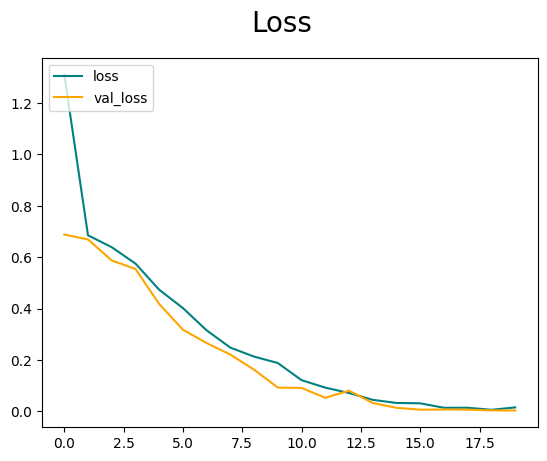

In [248]:
visualize_loss()

In [249]:
def visualize_accuracy():
  fig = plt.figure()
  plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
  plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
  fig.suptitle('Accuracy', fontsize=20)
  plt.legend(loc="upper left")
  plt.show()

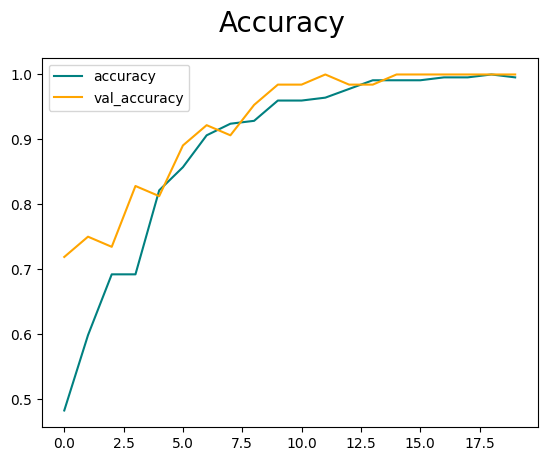

In [250]:
visualize_accuracy()

# Evaluate Performance

In [251]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [252]:
precision = Precision()
recall = Recall()
bin_accuracy = BinaryAccuracy()

In [253]:
len(test)

1

In [254]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  bin_accuracy.update_state(y,yhat)

1/1 [==============================] - 0s 85ms/step


In [255]:
print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {bin_accuracy.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


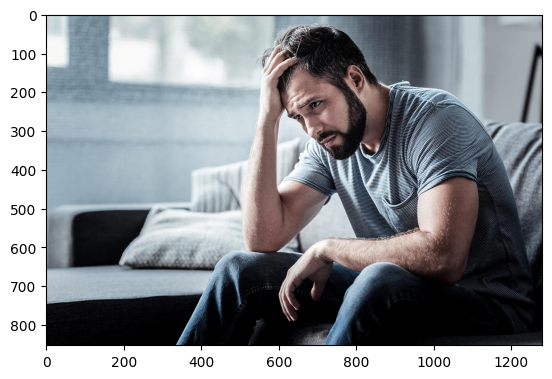

In [256]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/sadtest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

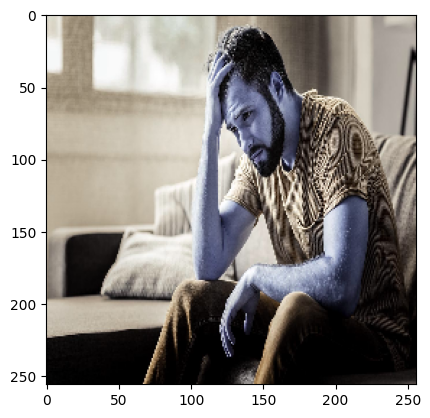

In [257]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [258]:
np.expand_dims(resize, 0)

array([[[[224.83398   , 221.83398   , 213.83398   ],
         [226.        , 223.        , 215.        ],
         [228.83398   , 225.83398   , 217.83398   ],
         ...,
         [197.16602   , 191.16602   , 180.16602   ],
         [194.        , 188.        , 177.        ],
         [192.        , 186.        , 175.        ]],

        [[221.0039    , 219.0039    , 209.0039    ],
         [222.50195   , 220.50195   , 210.50195   ],
         [226.50195   , 224.50195   , 214.50195   ],
         ...,
         [198.49805   , 192.49805   , 181.49805   ],
         [194.        , 188.        , 177.        ],
         [192.        , 186.        , 175.        ]],

        [[221.49023   , 219.49023   , 208.66016   ],
         [221.        , 219.        , 208.16992   ],
         [223.33984   , 221.33984   , 210.50977   ],
         ...,
         [199.        , 193.        , 182.        ],
         [195.66016   , 189.66016   , 178.66016   ],
         [192.83008   , 186.83008   , 175.83008   ]],

In [259]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


In [260]:
yhat

array([[0.99473625]], dtype=float32)

In [261]:
if yhat < 0.5:
  print('Happy Person!')
else:
  print('Sad Person :(')

Sad Person :(


# Save and Load model

In [262]:
from tensorflow.keras.models import load_model

In [263]:
model.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/', 'models', 'happysadmodel.h5'))

In [264]:
new_model = load_model(os.path.join('/content/drive/MyDrive/Colab Notebooks/', 'models', 'happysadmodel.h5'))

In [265]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 71ms/step


In [266]:
if yhat_new < 0.5:
  print("Happy person!")
else:
  print("Sad person :(")

Sad person :(
